# Pendahuluan


Dalam studi tentang kanker payudara, dataset yang digunakan menggambarkan berbagai fitur atau karakteristik sel tumor seperti radius, tekstur, keliling, luas, kehalusan, kepadatan, hingga simetri, serta beberapa metrik lainnya. Kolom target dalam dataset ini, y, merupakan variabel yang menandakan kelas atau status tertentu terkait tumor tersebut. Dalam upaya untuk menganalisis dan memprediksi kelas tumor, dua metode klasifikasi yang akan digunakan adalah Naive Bayes dan Decision Tree. Naive Bayes adalah metode yang berfokus pada probabilitas dan klasifikasi berdasarkan asumsi independensi antar-fitur, sementara Decision Tree adalah metode yang membangun struktur pohon keputusan berdasarkan fitur-fitur yang ada untuk mengklasifikasikan tumor ke dalam kategori yang sesuai.



**Atribut Information**


| Column						| Description | Type Data | Has missing value ? |
| --- | --- | --- | --- |
| x.radius_mean				| Mean radius of the tumor cells														| float | No |
| x.radius_mean				| Mean radius of the tumor cells| float | No |
| x.texture_mean			| Mean texture of the tumor cells															| float | No |		
| x.perimeter_mean			| Mean perimeter of the tumor cells| float | No |
| x.area_mean				| Mean area of the tumor cells| float | No |
| x.smoothness_mean			| Mean smoothness of the tumor cells| float | No |
| x.compactness_mean		| Mean compactness of the tumor cells| float | No |
| x.concavity_mean			| Mean concavity of the tumor cells| float | No |
| x.concave_points_mean		| Mean number of concave portions of the contour of the tumor cells| float | No |
| x.symmetry_mean			| Mean symmetry of the tumor cells| float | No |
| x.fractal_dimension_mean	| Mean "coastline approximation" of the tumor cells| float | No |
| x.radius_se				| Standard error of the radius of the tumor cells| float | No |
| x.texture_se				| Standard error of the texture of the tumor cells| float | No |
| x.perimeter_se			| Standard error of the perimeter of the tumor cells| float | No |
| x.area_se					| Standard error of the area of the tumor cells| float | No |
| x.smoothness_se			| Standard error of the smoothness of the tumor cells| float | No |
| x.compactness_se			| Standard error of the compactness of the tumor cells| float | No |
| x.concavity_se			| Standard error of the concavity of the tumor cells| float | No |
| x.concave_points_se		| Standard error of the number of concave portions of the contour of the tumor cells| float | No |
| x.symmetry_se				| Standard error of the symmetry of the tumor cells| float | No |
| x.fractal_dimension_se	| Standard error of the "coastline approximation" of the tumor cells| float | No |
| x.radius_worst			| Worst (largest) radius of the tumor cells| float | No |
| x.texture_worst			| Worst (most severe) texture of the tumor cells| float | No |
| x.perimeter_worst			| Wrst (largest) perimeter of the tumor cells| float | No |
| x.area_worst				| Worst (largest) area of the tumor cells| float | No |
| x.smoothness_worst		| Worst (most severe) smoothness of the tumor cells| float | No |
| x.compactness_worst		| Worst (most severe) compactness of the tumor cells| float | No |
| x.concavity_worst			| Worst (most severe) concavity of the tumor cells| float | No |
| x.concave_points_worst	| Worst (most severe) number of concave portions of the contour of the tumor cells| float | No |
| x.symmetry_worst			| Worst (most severe) symmetry of the tumor cells| float | No |
| x.fractal_dimension_worst	| Worst (most severe) "coastline approximation" of the tumor cells| float | No |
| y							| Target: M - Malignant B - Benign| object | No |

Dalam konteks kanker, istilah "malignant" dan "benign" merujuk pada dua tipe utama dari pertumbuhan atau tumor yang dapat terjadi pada tubuh:

1. Malignant:

    - Malignant mengacu pada tumor atau pertumbuhan yang cenderung bersifat ganas atau kanker. Sel-sel kanker pada tumor ganas dapat tumbuh dengan cepat dan menyebar ke jaringan sekitarnya. Mereka memiliki kecenderungan untuk menyerang jaringan sehat di sekitarnya atau menyebar (metastasis) ke bagian tubuh lain, yang bisa menyebabkan kerusakan serius pada organ atau sistem tubuh.
2. Benign:

    - Benign mengacu pada tumor atau pertumbuhan yang bersifat non-kanker atau tidak ganas. Tumor jenis ini cenderung tumbuh secara terbatas dan tidak menyebar ke jaringan di sekitarnya atau ke bagian tubuh lain. Meskipun demikian, tumor benign bisa menyebabkan masalah kesehatan jika menekan organ atau jaringan di sekitarnya, tergantung pada lokasinya.


## Library yang dibutuhkan

In [4]:
# import library
import pandas as pd
import numpy as np
# ignore warning
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.filterwarnings("ignore", category=FutureWarning)
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
# model requirements
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, make_scorer
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## Memuat Dan Memahami Data

In [5]:
# memuat data
df = pd.read_csv('brca.csv')

In [6]:
# menampilkan 5 baris data
df.head()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [7]:
# informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           569 non-null    int64  
 1   x.radius_mean        569 non-null    float64
 2   x.texture_mean       569 non-null    float64
 3   x.perimeter_mean     569 non-null    float64
 4   x.area_mean          569 non-null    float64
 5   x.smoothness_mean    569 non-null    float64
 6   x.compactness_mean   569 non-null    float64
 7   x.concavity_mean     569 non-null    float64
 8   x.concave_pts_mean   569 non-null    float64
 9   x.symmetry_mean      569 non-null    float64
 10  x.fractal_dim_mean   569 non-null    float64
 11  x.radius_se          569 non-null    float64
 12  x.texture_se         569 non-null    float64
 13  x.perimeter_se       569 non-null    float64
 14  x.area_se            569 non-null    float64
 15  x.smoothness_se      569 non-null    flo

In [8]:
# ukuran dataset
df.shape

(569, 32)

In [9]:
# menampilkan deskripsi umum dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,569.0,285.000000,164.400426,1.000000,143.000000,285.000000,427.000000,569.00000
x.radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
x.texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
x.perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
x.area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
x.smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
x.compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
x.concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
x.concave_pts_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
x.symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [10]:
# memeriksa duplikat
df.duplicated().sum()

0

In [11]:
# tabel untuk menampilkan fitur jika terdapat nilai yang hilang
missing_report_ = df.isna().sum().to_frame()
missing_report_.columns = ['missing_count']
missing_report_['percentage_of_total'] = (missing_report_.missing_count / len(df) * 100).round(2).astype('str') + '%'
missing_report_ = missing_report_.reset_index()
missing_report_.columns = ['columns','missing_count','percentage_of_total']
missing_report_

,columns,missing_count,percentage_of_total
0,Unnamed: 0,0,0.0%
1,x.radius_mean,0,0.0%
2,x.texture_mean,0,0.0%
3,x.perimeter_mean,0,0.0%
4,x.area_mean,0,0.0%
5,x.smoothness_mean,0,0.0%
6,x.compactness_mean,0,0.0%
7,x.concavity_mean,0,0.0%
8,x.concave_pts_mean,0,0.0%
9,x.symmetry_mean,0,0.0%


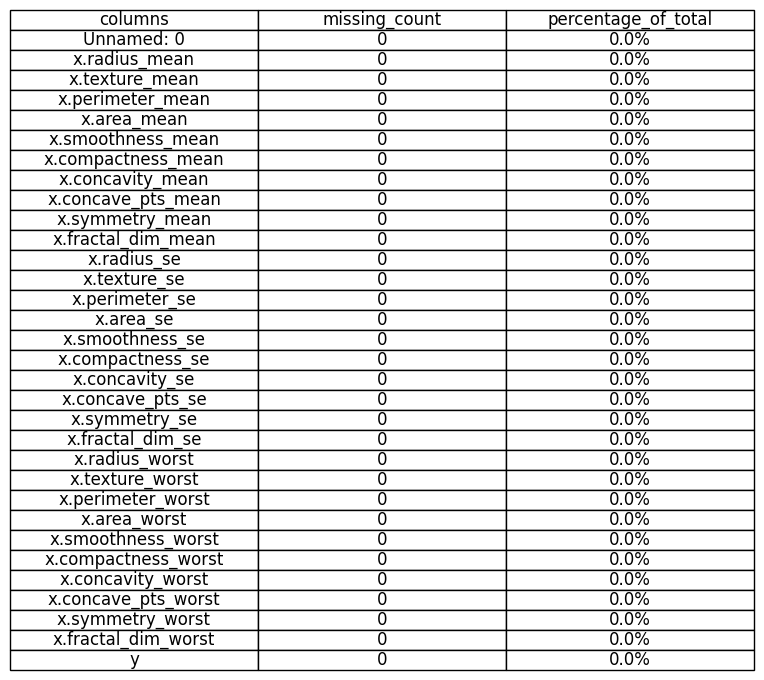

In [12]:
# Membuat visualisasi tabel sebagai gambar
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')  # Menghilangkan sumbu pada plot

table = ax.table(cellText=missing_report_.values, colLabels=missing_report_.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.savefig('missing_values_table.png', bbox_inches='tight', pad_inches=0.5)  # Simpan gambar sebagai file PNG
plt.show()


Dataset yang kita miliki terdapat 32 kolom dan 569 baris dan tidak terdapat satupun missing value dari setiap kolom seperti yang dapat diperhatikan pada tabel diatas.

In [13]:
# mengatur ukuran tabel
pd.set_option('display.max_colwidth', 1)

# list untuk menampung jumlah unique dan value unique
list_item = []

for col in df.columns:
    list_item.append([col, df[col].nunique(), df[col].unique()])
    
# membuat tabel unique
unique_table_info = pd.DataFrame(list_item, columns=['columns', 'number_unique', 'unique_value'])
# menampilkan tabel unique
unique_table_info

,columns,number_unique,unique_value
0,Unnamed: 0,569,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,x.radius_mean,456,"[13.54, 13.08, 9.504, 13.03, 8.196, 12.05, 13.49, 11.76, 13.64, 11.94, 11.52, 13.05, 8.618, 10.17, 8.598, 9.173, 9.465, 11.31, 9.029, 12.78, 8.888, 12.31, 13.53, 12.86, 11.45, 13.34, 12.0, 12.36, 14.64, 14.62, 13.27, 13.45, 12.18, 9.787, 11.6, 6.981, 9.876, 10.49, 11.64, 11.34, 9.777, 12.63, 14.26, 10.51, 8.726, 11.93, 8.95, 11.41, 14.5, 13.37, 13.85, 15.1, 12.19, 15.71, 11.71, 11.43, 11.28, 9.738, 12.9, 10.75, 11.9, 14.95, 14.44, 13.74, 13.0, 8.219, 9.731, 11.15, 13.15, 12.25, 16.84, 12.06, 10.9, 11.75, 12.34, 14.97, 10.8, 12.32, 11.08, 10.66, 8.671, 9.904, 13.01, 12.81, 10.08, 11.81, 12.3, 12.77, 9.72, 12.91, 12.23, 12.47, 13.11, 15.27, 11.84, 11.89, 10.2, 13.65, 13.56, 10.18, ...]"
2,x.texture_mean,479,"[14.36, 15.71, 12.44, 18.42, 16.84, 14.63, 22.3, 21.6, 16.34, 18.24, 18.75, 19.31, 11.79, 14.88, 20.98, 13.86, 21.01, 19.04, 17.33, 16.49, 14.64, 16.52, 10.94, 18.0, 20.97, 15.86, 15.65, 21.8, 15.24, 24.02, 14.76, 18.3, 17.84, 19.94, 12.84, 13.43, 20.52, 19.4, 19.29, 18.33, 18.54, 21.26, 16.99, 20.76, 19.65, 20.19, 15.83, 21.53, 15.76, 10.82, 10.89, 16.39, 17.21, 13.29, 13.93, 16.67, 15.39, 13.39, 11.97, 17.31, 15.92, 14.97, 14.65, 18.77, 15.18, 17.91, 20.78, 20.7, 15.34, 13.08, 17.94, 19.46, 12.74, 12.96, 20.18, 22.22, 19.76, 9.71, 16.95, 12.39, 14.71, 15.15, 14.45, 18.06, 13.06, 14.92, 15.11, 17.19, 17.39, 15.9, 21.41, 18.22, 16.33, 19.56, 18.6, 17.27, 22.54, 12.91, 18.94, 18.35, ...]"
3,x.perimeter_mean,522,"[87.46, 85.63, 60.34, 82.61, 51.71, 78.04, 86.91, 74.72, 87.21, 75.71, 73.34, 54.34, 64.55, 54.66, 59.2, 60.11, 71.8, 58.79, 81.37, 79.19, 87.91, 83.19, 73.81, 86.49, 76.95, 79.78, 95.77, 94.57, 84.74, 86.6, 77.79, 62.11, 74.34, 43.79, 77.22, 63.95, 67.41, 75.17, 79.01, 72.48, 62.5, 82.15, 97.83, 68.64, 55.84, 76.53, 58.74, 94.28, 86.1, 88.44, 99.58, 79.08, 102.0, 73.06, 73.0, 61.24, 73.66, 83.74, 68.26, 78.11, 97.84, 93.97, 88.12, 83.51, 53.27, 63.78, 70.87, 85.31, 78.27, 108.4, 76.84, 68.69, 76.1, 79.85, 95.5, 68.77, 96.22, 78.85, 70.21, 67.49, 54.42, 64.6, 82.01, 81.29, 73.53, 63.76, 74.68, 75.27, 78.83, 82.02, 60.73, 82.53, 78.54, 81.09, 62.92, 87.02, 98.17, 75.51, 77.32, 65.05, ...]"
4,x.area_mean,539,"[566.3, 520.0, 273.9, 523.8, 201.9, 449.3, 561.0, 427.9, 571.8, 437.6, 409.0, 527.2, 224.5, 311.9, 221.8, 260.9, 269.4, 394.1, 250.5, 502.5, 244.0, 470.9, 559.2, 506.3, 401.5, 443.3, 466.1, 651.9, 662.7, 551.7, 555.1, 451.1, 294.5, 412.6, 143.5, 458.7, 298.3, 336.1, 412.5, 466.7, 396.5, 290.2, 480.4, 629.9, 334.2, 230.9, 438.6, 245.2, 403.3, 640.7, 553.5, 588.7, 674.5, 455.8, 761.7, 423.6, 399.8, 384.8, 288.5, 398.0, 512.2, 355.3, 432.8, 689.5, 640.1, 585.0, 519.4, 203.9, 300.2, 381.9, 538.9, 460.3, 880.2, 448.6, 366.8, 419.8, 464.5, 690.2, 357.6, 685.9, 464.1, 372.7, 349.6, 227.2, 302.4, 526.4, 508.8, 402.0, 317.5, 420.3, 428.9, 463.7, 507.4, 288.1, 516.4, 461.0, 481.9, 295.4, 529.4, 725.5, ...]"
5,x.smoothness_mean,474,"[0.09779, 0.1075, 0.1024, 0.08983, 0.086, 0.1031, 0.08752, 0.08637, 0.07685, 0.08261, 0.09524, 0.0806, 0.09752, 0.1134, 0.1243, 0.07721, 0.1044, 0.08139, 0.1066, 0.09831, 0.09783, 0.09172, 0.1291, 0.09934, 0.1102, 0.1078, 0.09723, 0.08772, 0.1132, 0.08974, 0.07355, 0.1022, 0.1045, 0.117, 0.08013, 0.1005, 0.09989, 0.1142, 0.08477, 0.08759, 0.1037, 0.09933, 0.07837, 0.1122, 0.115, 0.09768, 0.09462, 0.09373, 0.1101, 0.07115, 0.08785, 0.1051, 0.09639, 0.1164, 0.0925, 0.1092, 0.08677, 0.07793, 0.1152, 0.08138, 0.0997, 0.07944, 0.1135, 0.09405, 0.1072, 0.09754, 0.09384, 0.08654, 0.07445, 0.09311, 0.07515, 0.1089, 0.1012, 0.08421, 0.09594,

**Kesimpulan**

Kita mempunyai dataset dengan ukuran 569 baris dan 32 kolom. Untuk type data tidak ada yang perlu diubah karena semuanya telah sesuai seperti yang diharapkan. Lalu kita juga tidak menjumpai adanya duplikat dari data dan dari ke 32 kolom kita akan membuang kolom `Unamed` karena dianggap tidak penting kemudian yang akan menjadi label/target adalah kolom `y` dan selebihnya kita jadikan sebagai features

## Melihat distribusi data dari kolom fitur

Karena fitur dari data kita semuanya merupakan variabel kuantitatif kontinu, kita akan melihat bagaimana distribusi data tersebut, apakah datanya terdistribusi normal atau tidak.

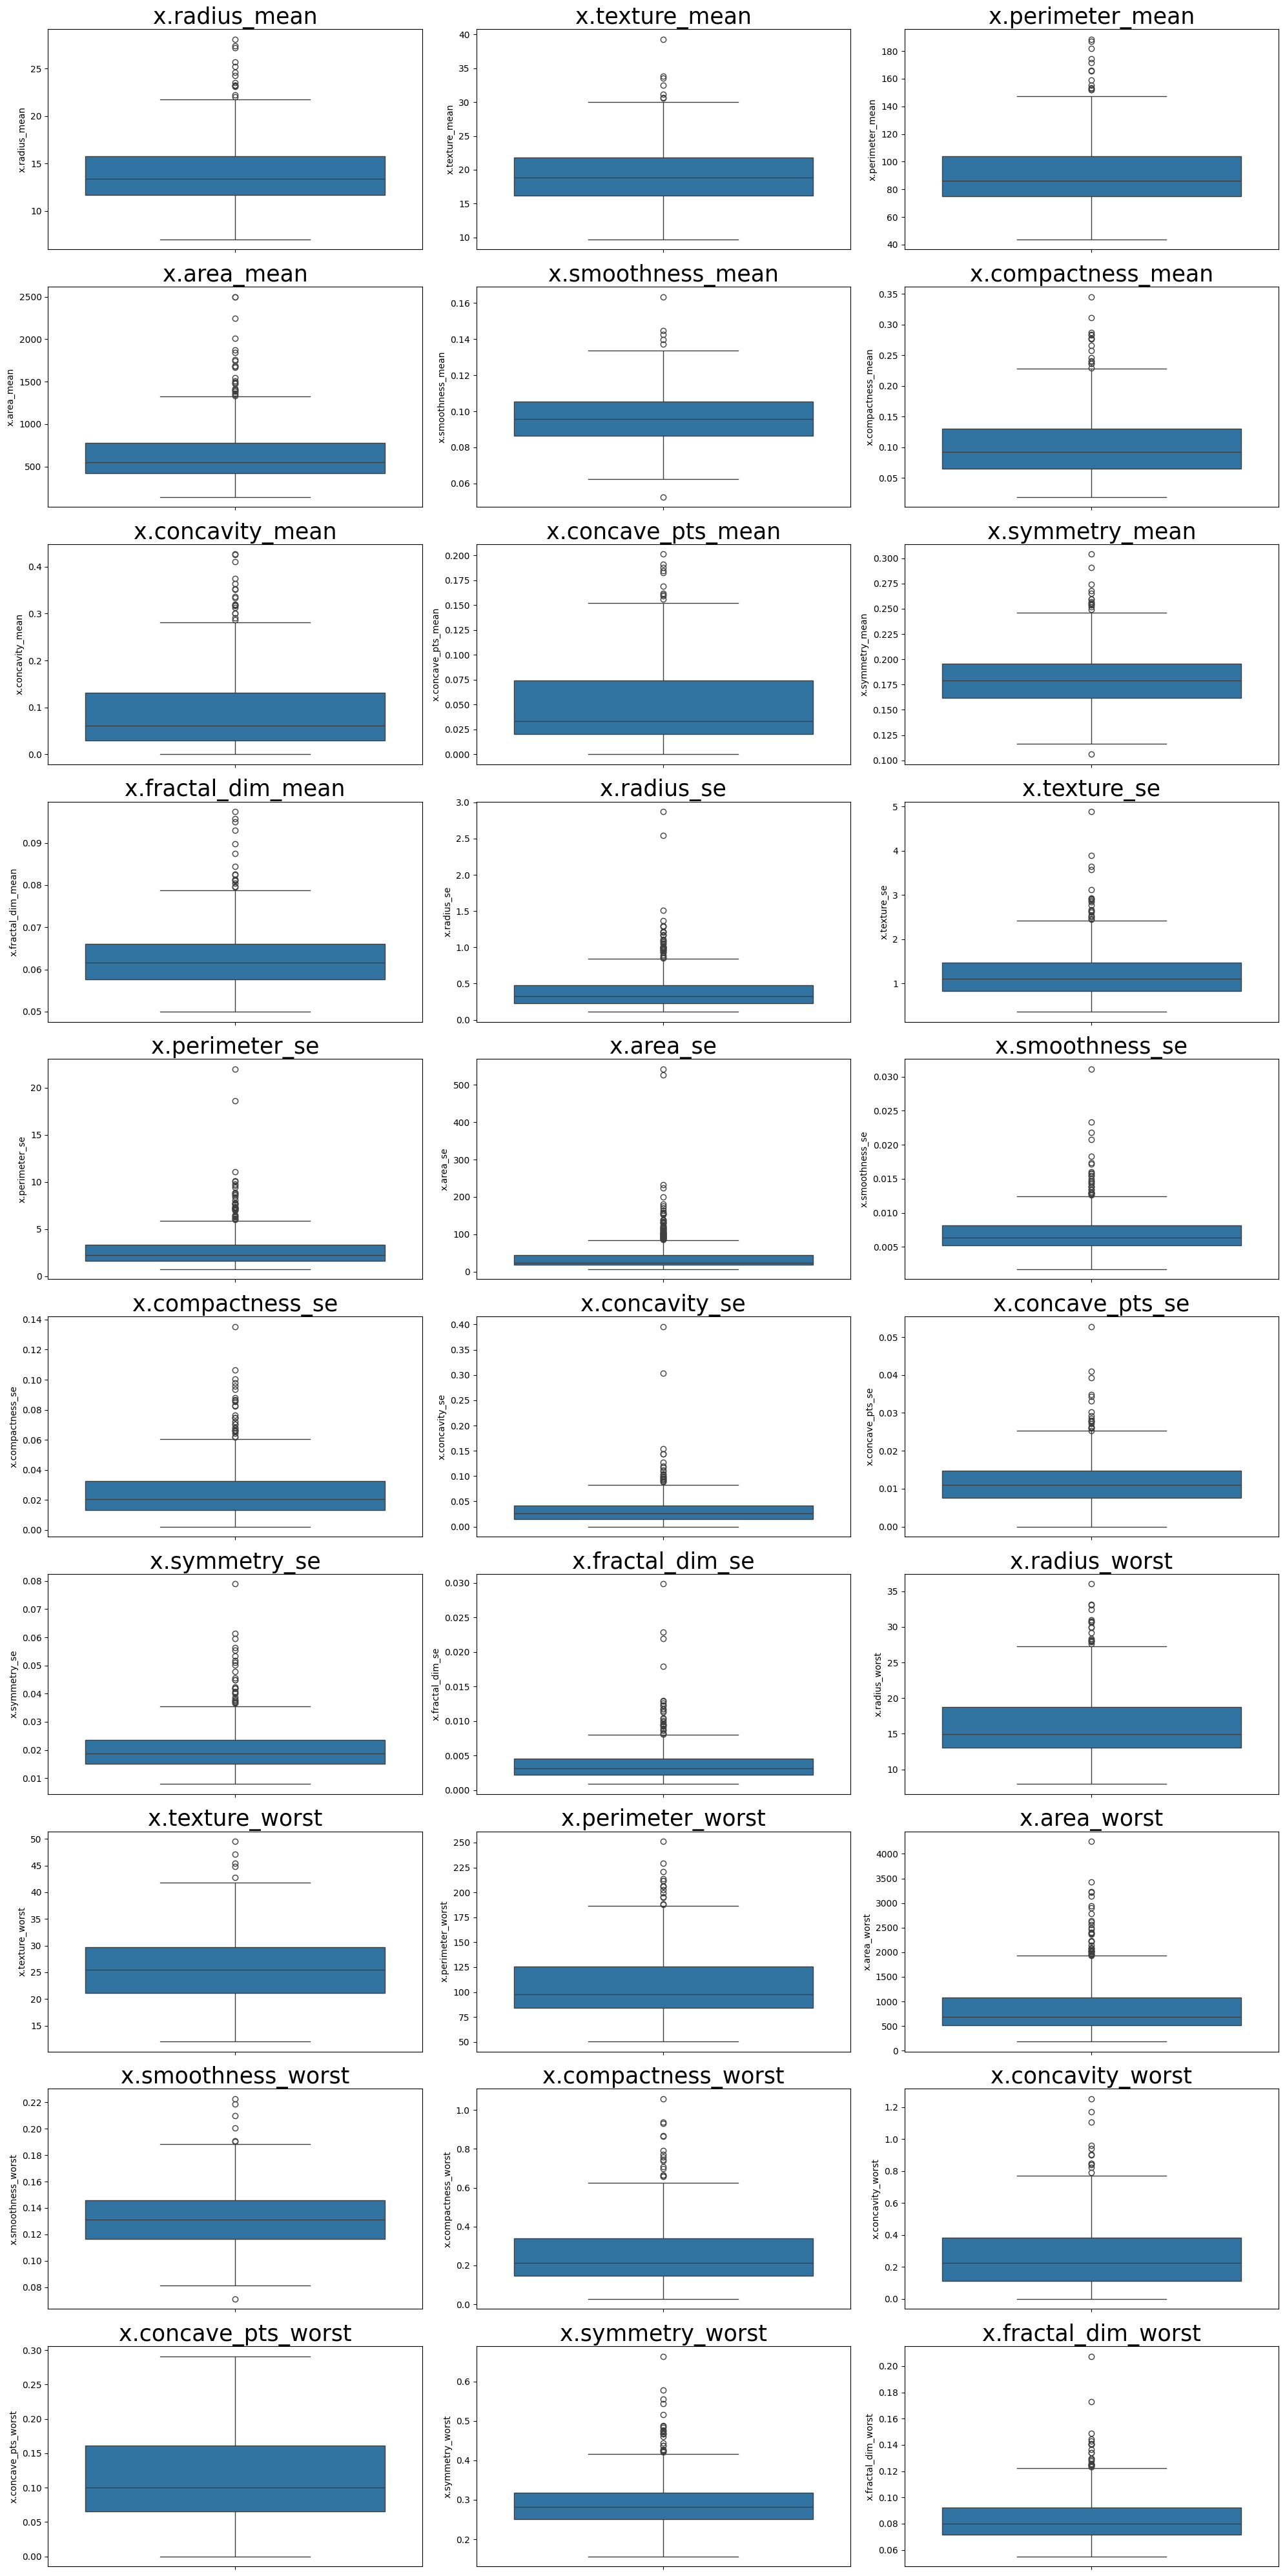

In [17]:
# menampilkan distribusi data pada kolom numerikal
columns = df.describe().columns.drop(['Unnamed: 0'])

fig, axes = plt.subplots(10, 3, figsize=(20, 40)) 
for i, j in zip(columns, axes.flatten()):
    ax = sns.boxplot(data=df, y=i, ax=j)
    ax.set_title(f'{i}', size=25) 
plt.tight_layout()
plt.show()

Sepertinya dari sekian banyak kolom fitur yang kita punya secara keseluruhan terdapat outlier. Kita akan coba hitung seberapa banyak data kita yang terdapat diluar batas whisker.

In [18]:
# mencari nilai lower dan upper limit pada masing-masing kolom numerikal
list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in columns: 
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_limit = df[feature].quantile(0.25) - 1.5*IQR
    upper_limit = df[feature].quantile(0.75) + 1.5*IQR
    
    list_lower.append(lower_limit)
    list_upper.append(upper_limit)
    number_lower.append(len(df[df[feature]<lower_limit])) # menghitung jumlah data yang diluar batas bawah
    number_inside.append(len(df[(df[feature]>=lower_limit) & (df[feature]<=upper_limit)])) # data yg berada didalam rentang kuartil
    number_upper.append(len(df[df[feature]>upper_limit])) # jumlah data yang diluar batas atas
    percentage_outlier.append(round((len(df[df[feature]<lower_limit]) + len(df[df[feature]>upper_limit])) / len(df)  *100, 2))

# membuat dataset untuk menampilkan jumlah dan persentase data outlier
outliers = pd.DataFrame({
    'columns' : columns,
    'lower_limit' : list_lower,
    'upper_limit' : list_upper,
    'count_outside_lower' : number_lower,
    'count_inside' : number_inside,
    'count_outside_upper' : number_upper,
    'percent_outlier' : percentage_outlier
})

outliers['percent_outlier'] = outliers['percent_outlier'].astype('str') +'%'
outliers

,columns,lower_limit,upper_limit,count_outside_lower,count_inside,count_outside_upper,percent_outlier
0,x.radius_mean,5.580000,21.900000,0,555,14,2.46%
1,x.texture_mean,7.725000,30.245000,0,562,7,1.23%
2,x.perimeter_mean,31.775000,147.495000,0,556,13,2.28%
3,x.area_mean,-123.300000,1326.300000,0,544,25,4.39%
4,x.smoothness_mean,0.057975,0.133695,1,563,5,1.05%
5,x.compactness_mean,-0.033300,0.228620,0,553,16,2.81%
6,x.concavity_mean,-0.122150,0.282410,0,551,18,3.16%
7,x.concave_pts_mean,-0.060225,0.154535,0,559,10,1.76%
8,x.symmetry_mean,0.111200,0.246400,1,554,14,2.64%
9,x.fractal_dim_mean,0.045070,0.078750,0,554,15,2.64%


Dari hasil yang kita lihat, kita mendapatkan persentase yang cukup banyak, jika kita menghapus seluruh outlier mungkin dataset kita akan kurang dari 500 baris. Untuk itu kita tidak akan menghapus data yang mengandung outlier tersebut, mungkin kita akan melakukan penskalaan fitur dengan menggunakan RobustScaler().

## Korelasi Features Terhadap Target

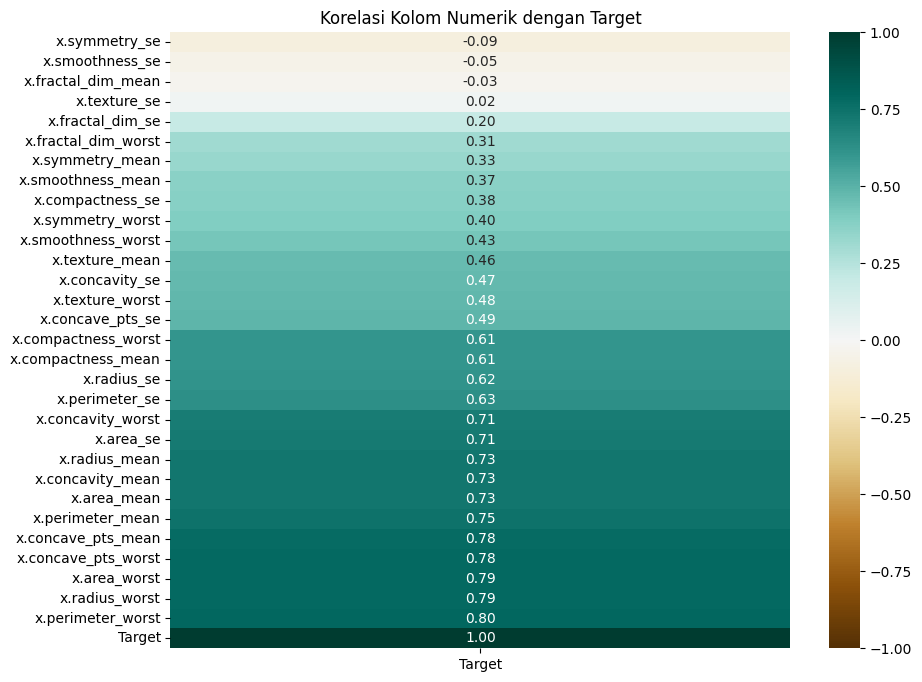

In [19]:
# Visualisasi Pengaruh Kolom Numerikal Terhadap Target
df_heatmap = df.drop('Unnamed: 0', axis=1)
df_heatmap['Target'] = df_heatmap['y'].apply(lambda x : 1 if x == 'M' else 0)
correlations = df_heatmap.corr(method='spearman',numeric_only=True)['Target'].sort_values()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(pd.DataFrame(correlations), annot=True, cmap='BrBG', fmt='.2f', vmin=-1, vmax=1)
heatmap.set_title('Korelasi Kolom Numerik dengan Target')
plt.savefig('heatmap_visualization.png', bbox_inches='tight')  # Simpan sebagai file gambar PNG
plt.show()


Kita bisa menghapus kolom fitur berdasarkan korelasinya yang mendekati 0. Kolom fitur yang memiliki korelasi mendekati 0 berarti tidak memiliki pengaruh yang signifikan terhadap target. Dengan menghapus kolom fitur tersebut, kita dapat mengurangi dimensi dataset dan berharap akan meningkatkan kinerja model.

In [20]:
# Hapus kolom yang korelasinya mendekati 0
for i in range(len(correlations)):
    if correlations[i] < 0.10:
        df.drop(columns=[correlations.index[i]], inplace=True)

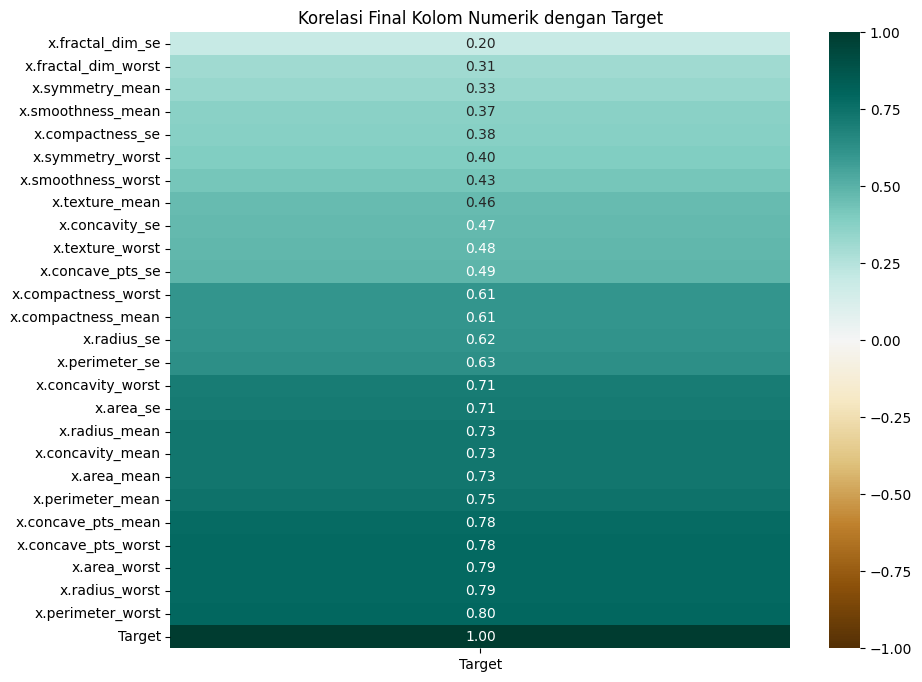

In [21]:
# Visualisasi Pengaruh Kolom Numerikal Terhadap Target
df_heatmap = df.drop('Unnamed: 0', axis=1)
df_heatmap['Target'] = df_heatmap['y'].apply(lambda x : 1 if x == 'M' else 0)
correlations = df_heatmap.corr(method='spearman', numeric_only=True)['Target'].sort_values()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(pd.DataFrame(correlations), annot=True, cmap='BrBG', fmt='.2f', vmin=-1, vmax=1)
heatmap.set_title('Korelasi Final Kolom Numerik dengan Target')
plt.show()

In [22]:
len(df.columns)

28

## Memeriksa Keseimbangan Kelas Label/Target

In [23]:
dist_class = df.y.value_counts().to_frame().reset_index()
dist_class['percent'] = (dist_class['count'] / len(df) * 100).round(2).astype('str') + '%'
dist_class

,y,count,percent
0,B,357,62.74%
1,M,212,37.26%


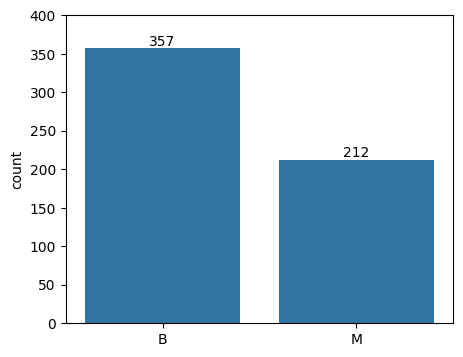

In [24]:
plt.figure(figsize=(5,4))

ax = sns.countplot(data=df, x='y')

for container in ax.containers:
    ax.bar_label(container)

plt.ylim(0, 400)
plt.xlabel("")
plt.show()

Sepertinya label target kita memiliki ketidak seimbangan kelas target dimana komposisi label `B` sebanyak 62.74% dan label `M` sebanyak 37.26%.

## Data Preparation

Karena pada tahap sebelumnya kita mengetahui bahwa data kita terdapat outlier dan terdapat ketidak seimbangan kelas. Maka kita akan melakukan penskalaan fitur menggunakaan teknik Robust.

### Membagi Data Features dan Target

Kita akan membuang kolom `Unnamed: 0` dan `y` dari fitur dan kolom `y` digunakan sebagai label/target.

In [25]:
# features
features = df.drop(['Unnamed: 0', 'y'], axis=1)
# target
target = df['y']

In [26]:
len(features.columns)

26

### Standardisasi Features menggunakan RobustScaler

Karena pada tahap sebelumnya kita mengetahui bahwa data kita terdapat outlier. Maka kita akan melakukan penskalaan fitur menggunakaan teknik RobustScaler(), adapun cara kerja penskalaan ini yaitu:

- Menggunakan median dan interquartile range (IQR) untuk mereskalakan fitur-fitur, yang membuatnya lebih tahan terhadap outlier. 
- Lebih stabil terhadap outlier karena menggunakan nilai-nilai yang lebih resisten terhadap nilai ekstrem (median dan IQR).
- Cocok untuk data dengan adanya outlier atau distribusi yang tidak normal.

In [27]:
# Scaler
robust = RobustScaler()

In [28]:
# model yang akan digunakan
DTClass = DecisionTreeClassifier(random_state=45)
RFClass = RandomForestClassifier(random_state=45)
LRClass = LogisticRegression(random_state=45, solver='liblinear')
NBClass = GaussianNB()
KNNClass = KNeighborsClassifier()
#
models = [DTClass, RFClass, LRClass, NBClass, KNNClass]

In [29]:
# fungsi encoded kelas target
def encoded_label_(data):
    data = data.replace({'M':1, 'B':0})
    return data

In [30]:
# fungsi training model
def model_(x, y, models):
    model_name = []
    test_sizes = []
    accuracy_test = []
    precision_test = []
    recall_test =[]
    f1_test = []

    for t_size in np.arange(0.1, 0.5, 0.1):
        # splitting data
        features_train, features_valid, target_train, target_valid = train_test_split(x, y, 
                                                                                      test_size=t_size, 
                                                                                      random_state=45)
        #
        for algo in models:
            model_pipe = Pipeline([
                ('scaler', robust),
                ('algo', algo)
            ])
            # encoding label target
            target_train = encoded_label_(target_train)
            target_valid = encoded_label_(target_valid)
            #
            name = algo.__class__.__name__
            # fitting
            model_pipe.fit(features_train, target_train)

            # 
            pred_valid = model_pipe.predict(features_valid)
            scores = model_pipe.score(features_valid, target_valid)
            precisions = precision_score(target_valid, pred_valid)
            recalls = recall_score(target_valid, pred_valid)
            f1_s = f1_score(target_valid, pred_valid)
            #
            model_name.append(name)
            test_sizes.append(f"{t_size:.0%}")
            accuracy_test.append(round(scores, 3))
            precision_test.append(precisions.round(3))
            recall_test.append(recalls.round(3))
            f1_test.append(f1_s.round(3))
            # 
    model_report = pd.DataFrame({
        'model_name' : model_name,
        'test_size' : test_sizes,
        'accuracy_score' : accuracy_test,
        'precision_score' : precision_test,
        'recall_score' : recall_test,
        'f1_score' : f1_test
    })
    return model_report.sort_values(['model_name','test_size'])

## Training Model With Imbalance Class

In [31]:
# laporan hasil model dengan imbalance class
imbalance_model = model_(features, target, models)
imbalance_model

,model_name,test_size,accuracy_score,precision_score,recall_score,f1_score
0,DecisionTreeClassifier,10%,0.965,0.895,1.000,0.944
5,DecisionTreeClassifier,20%,0.904,0.886,0.816,0.849
10,DecisionTreeClassifier,30%,0.930,0.892,0.921,0.906
15,DecisionTreeClassifier,40%,0.899,0.866,0.855,0.861
3,GaussianNB,10%,0.895,0.762,0.941,0.842
8,GaussianNB,20%,0.904,0.829,0.895,0.861
13,GaussianNB,30%,0.912,0.864,0.905,0.884
18,GaussianNB,40%,0.908,0.860,0.892,0.876
4,KNeighborsClassifier,10%,0.982,0.944,1.000,0.971
9,KNeighborsClassifier,20%,0.965,0.972,0.921,0.946


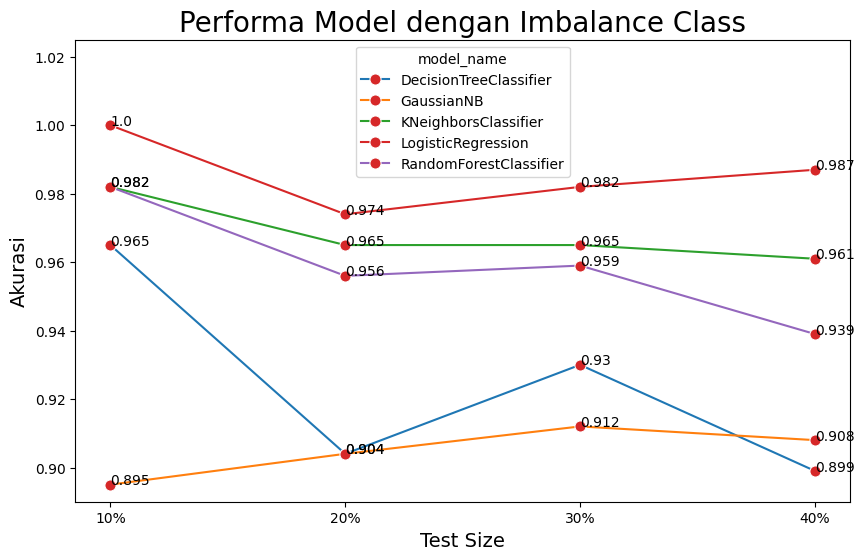

In [32]:
# visualisasi hasil akurasi
plt.figure(figsize=(10,6))

ax = sns.lineplot(data=imbalance_model, x='test_size', y='accuracy_score', hue='model_name', marker='o', markerfacecolor='tab:red', markersize=8)
# Menambahkan angka accuracy_score
for i in range(len(imbalance_model)):
    plt.annotate(round(imbalance_model['accuracy_score'].iloc[i], 3), (imbalance_model['test_size'].iloc[i], imbalance_model['accuracy_score'].iloc[i]))


plt.title('Performa Model dengan Imbalance Class', size=20)
plt.ylabel('Akurasi', size=14)
plt.xlabel('Test Size', size=14)
plt.ylim(0.89, 1.0250)
plt.show()

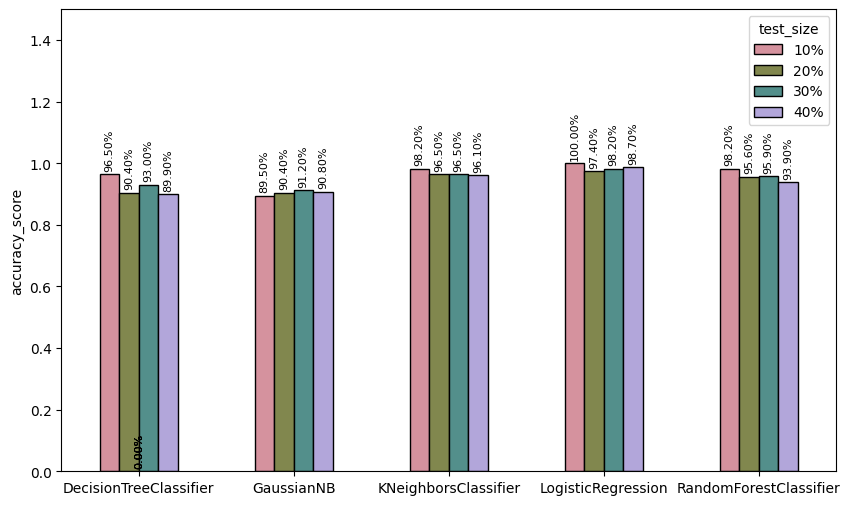

In [33]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(data=imbalance_model, x='model_name', y='accuracy_score', hue='test_size', 
                 palette='husl', 
                 edgecolor='black', saturation=.5, width=0.5)

for bar in ax.patches:
    bar_value = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar_value + 0.01,
        f'{bar_value:.2%}',
        ha='center', va='bottom', color='black', fontsize=8, rotation=90,
    )

plt.ylim(0, 1.5)
plt.xlabel("")
plt.savefig('imbalance_model_score.png', bbox_inches='tight')  # Simpan sebagai file gambar PNG
plt.show()


## Training Model With Balancing Class (SMOTE)

In [34]:
# menggunakan teknik SMOTE untuk balancing 
features_bal, target_bal = SMOTE(random_state=12345).fit_resample(features, target)

In [35]:
balancing = target_bal.value_counts().to_frame().reset_index()
balancing['percent'] = (balancing['count'] / len(features_bal) * 100).round(2).astype('str') + '%'
balancing

,y,count,percent
0,B,357,50.0%
1,M,357,50.0%


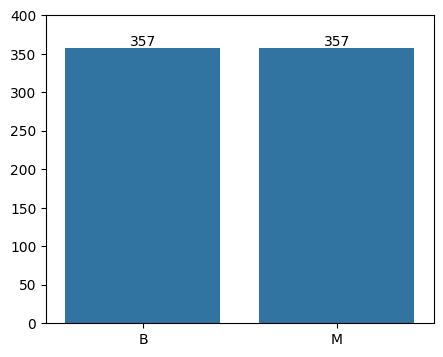

In [36]:
# visualisasi label klas yang sudah di balancing
plt.figure(figsize=(5,4))

ax = sns.barplot(data=balancing, x='y', y='count')

for container in ax.containers:
    ax.bar_label(container)

plt.ylim(0, 400)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [37]:
balance_model = model_(features_bal, target_bal, models)
balance_model

,model_name,test_size,accuracy_score,precision_score,recall_score,f1_score
0,DecisionTreeClassifier,10%,0.903,0.854,0.972,0.909
5,DecisionTreeClassifier,20%,0.923,0.903,0.942,0.922
10,DecisionTreeClassifier,30%,0.958,0.928,0.990,0.958
15,DecisionTreeClassifier,40%,0.948,0.919,0.979,0.948
3,GaussianNB,10%,0.958,0.971,0.944,0.958
8,GaussianNB,20%,0.951,0.970,0.928,0.948
13,GaussianNB,30%,0.944,0.942,0.942,0.942
18,GaussianNB,40%,0.941,0.936,0.943,0.940
4,KNeighborsClassifier,10%,0.986,0.973,1.000,0.986
9,KNeighborsClassifier,20%,0.986,0.986,0.986,0.986


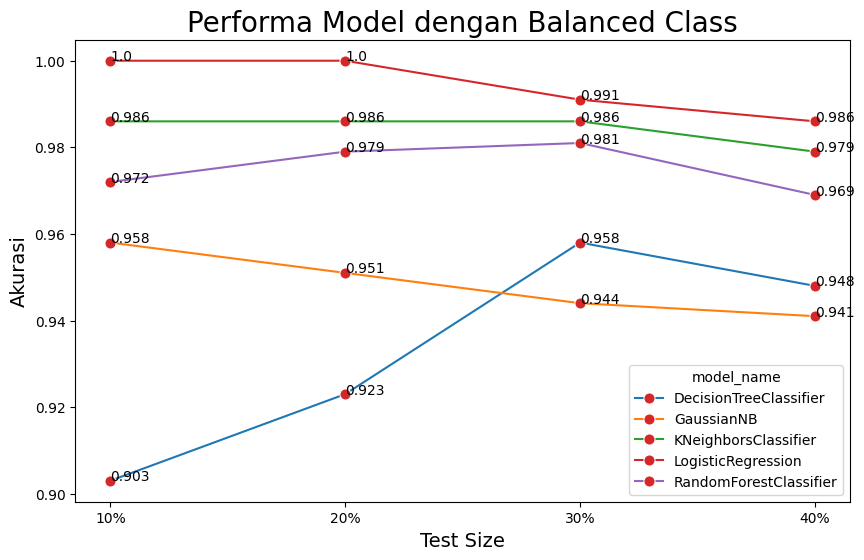

In [38]:
# visualisasi hasil akurasi
plt.figure(figsize=(10,6))

ax = sns.lineplot(data=balance_model, x='test_size', y='accuracy_score', hue='model_name',marker='o', markerfacecolor='tab:red', markersize=8)
# Menambahkan angka accuracy_score
for i in range(len(balance_model)):
    plt.annotate(round(balance_model['accuracy_score'].iloc[i], 3), (balance_model['test_size'].iloc[i], balance_model['accuracy_score'].iloc[i]))


plt.title('Performa Model dengan Balanced Class', size=20)
plt.ylabel('Akurasi', size=14)
plt.xlabel('Test Size', size=14)

plt.show()

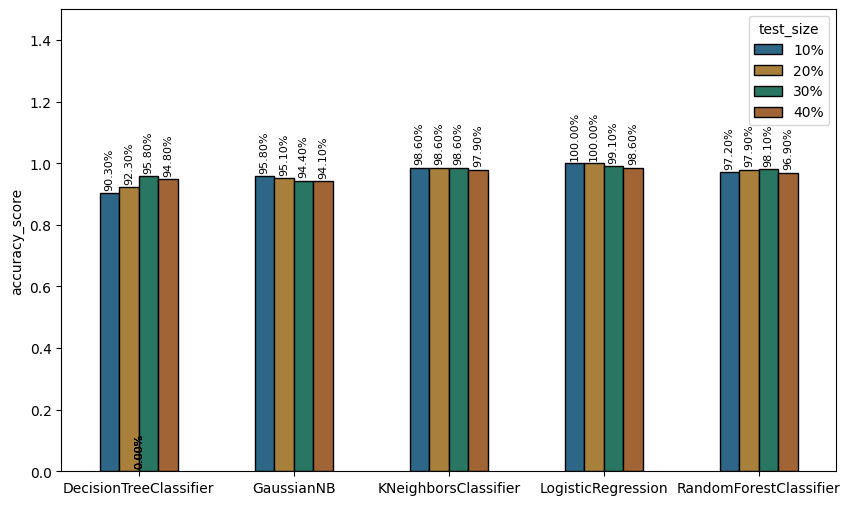

In [39]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(data=balance_model, x='model_name', y='accuracy_score', hue='test_size', 
                 palette='colorblind', 
                 edgecolor='black', saturation=.5, width=0.5)

for bar in ax.patches:
    bar_value = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar_value + 0.01,
        f'{bar_value:.2%}',
        ha='center', va='bottom', color='black', fontsize=8, rotation=90,
    )

plt.ylim(0, 1.5)
plt.xlabel("")
plt.savefig('balanced_model_score.png', bbox_inches='tight')  # Simpan sebagai file gambar PNG
plt.show()


**Kesimpulan**

Setelah kita melatih model dengan imbalance dan balance class. Ternyata kita mendapatkan model terbaik menggunakan algoritma LogisticRegression. Pada imbalance class, algoritma logistic mendapat akurasi 100% disaat kita menggunakan perbandingan data train dan testnya adalah 90:10. Kemudian pada balancing class kita mendapatkan peningkatan akurasi pada komposisi data 80:20 menjadi 100%, sedangkan untuk 70:30 dan 60:40 kita mendapatkan peningkatan akurasi sebesar 1%. 

Jadi secara keseluruhan model logistic regression mempunyai performa yang bagus ketika mempunyai lebih banyak data untuk ditraining, kita dapat melihatnya dari perbandingan akurasi pada setiap komposisi data yang berbeda. 

## Tuning Hyper-param Logistic Regression

Kita akan melakukan percobaan dalam tuning hyper-param, apakah model logistic kita mencapai performa yang lebih maksimal untuk data training yang lebih sedikit. Pada tahap ini kita menggunakan features dan target yang sudah kita balancing menggunakan teknik SMOTE.

In [40]:
LRClass.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 45,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [41]:
lr_pipeline = Pipeline([
    ('scaler', robust),
    ('algo', LRClass)
])

param_grid = {'algo__C': [0.1, 0.2, 0.25, 0.50, 0.75, 1, 10, 15, 25, 50, 100],
              'algo__intercept_scaling': [1, 1.25, 1.5, 2, 2.5, 3, 4, 5, 10, 10.75, 15],
              'algo__max_iter' : [100, 102, 105, 110, 112, 145, 184, 193, 200],
              'algo__random_state' : [0, 45, 12345]
             }

# splitting data
features_train, features_valid, target_train, target_valid = train_test_split(features_bal, target_bal, 
                                                                              test_size=0.4, 
                                                                              random_state=45)
# grid search cv object
grid_search = GridSearchCV(lr_pipeline, param_grid, scoring='accuracy', cv=5)

# fit grid search ke data training
grid_search.fit(features_train, target_train)

# menampilkan parameter terbaik
print(grid_search.best_params_)
best_lr = grid_search.best_estimator_

{'algo__C': 0.75, 'algo__intercept_scaling': 1, 'algo__max_iter': 100, 'algo__random_state': 0}


In [42]:
lr_pipeline = Pipeline([
    ('scaler', robust),
    ('algo', LogisticRegression(random_state=45, C=0.5, solver='liblinear', max_iter=100))
])
#
model_name = []
test_sizes = []
accuracy_test = []
precision_test = []
recall_test =[]
f1_test = []

#
for t_size in np.arange(0.1, 0.5, 0.1):
        # splitting data
        features_train, features_valid, target_train, target_valid = train_test_split(features_bal, target_bal, 
                                                                                      test_size=t_size, 
                                                                                      random_state=45)

        # encoding label target
        target_train = encoded_label_(target_train)
        target_valid = encoded_label_(target_valid)
        #
        name = lr_pipeline['algo'].__class__.__name__
        # fitting
        best_lr.fit(features_train, target_train)

        # 
        pred_valid = best_lr.predict(features_valid)
        scores = best_lr.score(features_valid, target_valid)
        precisions = precision_score(target_valid, pred_valid)
        recalls = recall_score(target_valid, pred_valid)
        f1_s = f1_score(target_valid, pred_valid)
        #
        model_name.append(name)
        test_sizes.append(f"{t_size:.0%}")
        accuracy_test.append(round(scores,3))
        precision_test.append(precisions.round(3))
        recall_test.append(recalls.round(3))
        f1_test.append(f1_s.round(3))
            
model_report = pd.DataFrame({
    'model_name' : model_name,
    'test_size' : test_sizes,
    'accuracy_score' : accuracy_test,
    'precision_score' : precision_test,
    'recall_score' : recall_test,
    'f1_score' : f1_test
})
model_report.sort_values('model_name')

,model_name,test_size,accuracy_score,precision_score,recall_score,f1_score
0,LogisticRegression,10%,1.000,1.000,1.000,1.000
1,LogisticRegression,20%,1.000,1.000,1.000,1.000
2,LogisticRegression,30%,0.991,0.981,1.000,0.990
3,LogisticRegression,40%,0.986,0.986,0.986,0.986


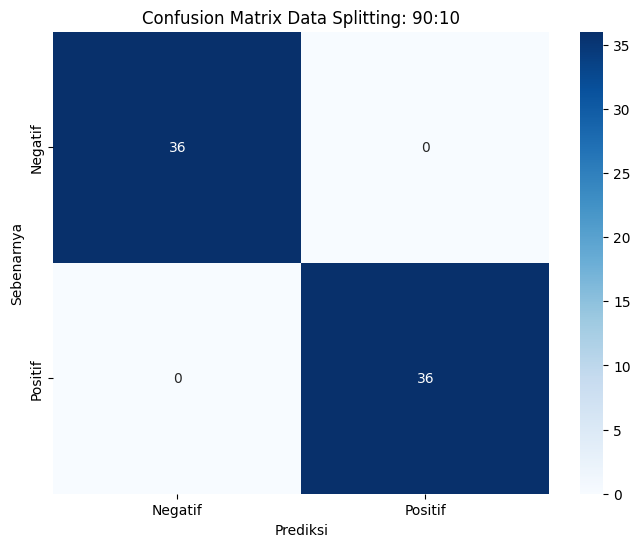

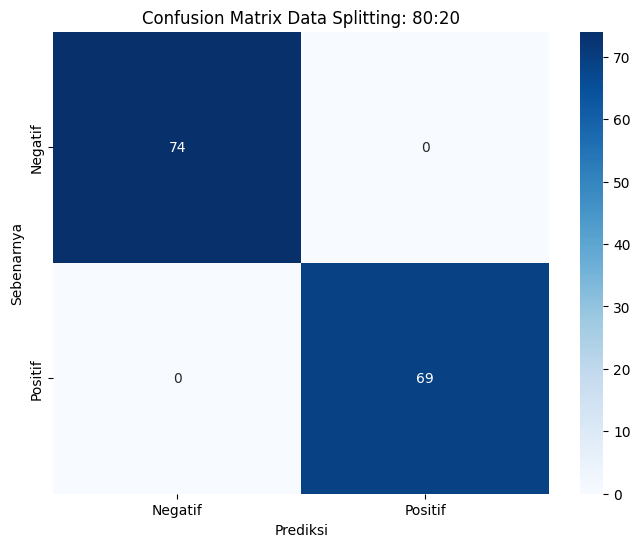

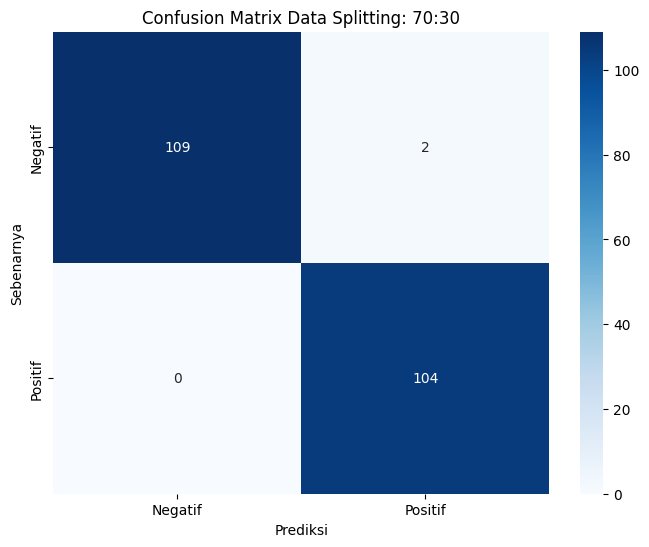

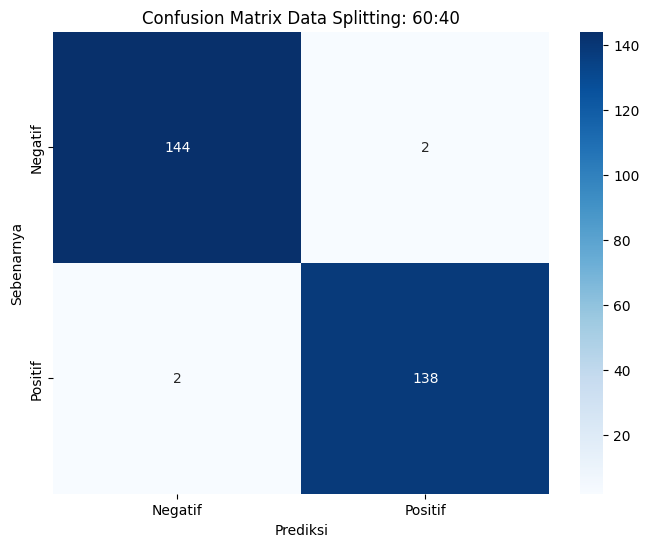

In [43]:
for t_size in np.arange(0.1, 0.5, 0.1):
        # splitting data
        features_train, features_valid, target_train, target_valid = train_test_split(features_bal, target_bal, 
                                                                                      test_size=t_size, 
                                                                                      random_state=45)

        # encoding label target
        target_train = encoded_label_(target_train)
        target_valid = encoded_label_(target_valid)
        #
        name = lr_pipeline['algo'].__class__.__name__
        # fitting
        lr_pipeline.fit(features_train, target_train)

        # 
        pred_valid = lr_pipeline.predict(features_valid)
        
        cm = confusion_matrix(target_valid, pred_valid)
        # plot confusion matrix
        plt.figure(figsize=(8,6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
        plt.xlabel('Prediksi')
        plt.ylabel('Sebenarnya')
        plt.title(f'Confusion Matrix Data Splitting: {(1-t_size)*100:.0f}:{t_size*100:.0f}')
        plt.show()

In [44]:
features_train, features_valid, target_train, target_valid = train_test_split(features_bal, target_bal, test_size=0.1, random_state=45)
lr_pipeline.fit(features_train, target_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('algo',
                 LogisticRegression(C=0.5, random_state=45,
                                    solver='liblinear'))])

In [45]:
features_valid.iloc[1]

x.radius_mean          23.618789  
x.texture_mean         25.424085  
x.perimeter_mean       156.954558 
x.area_mean            1719.227452
x.smoothness_mean      0.097367   
x.compactness_mean     0.180406   
x.concavity_mean       0.205364   
x.concave_pts_mean     0.130436   
x.symmetry_mean        0.193261   
x.radius_se            1.038856   
x.perimeter_se         7.190288   
x.area_se              151.222711 
x.compactness_se       0.029635   
x.concavity_se         0.042304   
x.concave_pts_se       0.016817   
x.fractal_dim_se       0.003544   
x.radius_worst         30.696211  
x.texture_worst        32.327871  
x.perimeter_worst      205.913636 
x.area_worst           2857.060290
x.smoothness_worst     0.144098   
x.compactness_worst    0.414385   
x.concavity_worst      0.548548   
x.concave_pts_worst    0.255903   
x.symmetry_worst       0.311855   
x.fractal_dim_worst    0.089632   
Name: 682, dtype: float64

In [46]:
lr_pipeline.predict(features_valid.iloc[[1]])

array(['M'], dtype=object)

In [47]:
import pickle

filename = 'stream_model/ipyd_model.sav'
pickle.dump(lr_pipeline, open(filename, 'wb'))